<a href="https://colab.research.google.com/github/isabel-sha/ml-ai/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from datetime import timedelta
import string
import numpy as np

In [2]:
# Upload the dataset
uploaded = files.upload()

Saving modified_incident_metric.csv to modified_incident_metric (1).csv


In [3]:
# Load the CSV file into a data frame
df = pd.read_csv('modified_incident_metric.csv')
df

,Number,Requested For,Business unit,Assigned to,Assignment group,Active,State,Priority,Category,Channel,...,Created,Updated,Resolved,Closed,Reopen count,Reassignment count,Change,Value,Start,End
0,INC684078,QH06HW,Department DVL,NaN,Team OLW,True,New,4 - Low,NaN,Self-service,...,2025-11-05 22:05:26,2025-11-05 22:05:26,NaN,NaN,0,0,Assignment Group,Team OLW,2025-11-05 22:05:26,NaN
1,INC824935,HUHUCS,Department DKV,NaN,Team OLW,True,New,4 - Low,NaN,Self-service,...,2025-10-30 02:01:23,2025-10-30 02:01:23,NaN,NaN,0,0,Assignment Group,Team OLW,2025-10-30 02:01:23,NaN
2,INC700227,03R5DI,Department WHS,NaN,Team OLW,True,New,4 - Low,NaN,Phone,...,2025-10-30 03:02:24,2025-10-30 03:02:24,NaN,NaN,0,0,Assignment Group,Team OLW,2025-10-30 03:02:24,NaN
3,INC684248,4W53ZC,Department DKV,NaN,Team SWO,True,New,4 - Low,Software,Phone,...,2025-10-27 12:10:52,2025-10-27 12:10:52,NaN,NaN,0,0,Assignment Group,Team SWO,2025-10-27 12:10:52,NaN
4,INC333986,BJ66DH,Department LUF,NaN,Team UGY,True,New,4 - Low,Inquiry,Email,...,2025-11-08 09:31:27,2025-11-08 09:31:27,NaN,NaN,0,0,Assignment Group,Team UGY,2025-11-08 09:31:27,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23805,INC753482,S10Q9B,Department SZM,SIVUP4,Team UPP,False,Closed,4 - Low,Computer,Self-service,...,2025-09-21 02:25:07,2025-10-03 04:36:05,2025-09-28 04:02:17,2025-10-03 04:36:05,0,1,Assigned to,5MEDDK,2025-09-24 02:13:59,2025-09-27 07:07:55
23806,INC753482,S10Q9B,Department SZM,SIVUP4,Team UPP,False,Closed,4 - Low,Computer,Self-service,...,2025-09-15 00:23:02,2025-09-27 02:34:00,2025-09-22 02:00:12,2025-09-27 02:34:00,0,1,Assigned to,SIVUP4,2025-09-21 05:05:50,2025-09-27 02:34:00
23807,INC753482,S10Q9B,Department SZM,SIVUP4,Team UPP,False,Closed,4 - Low,Computer,Self-service,...,2025-09-19 11:21:28,2025-10-01 13:32:26,2025-09-26 12:58:38,2025-10-01 13:32:26,0,1,Assignment Group,Team UPP,2025-09-25 16:04:16,2025-10-01 13:32:26
23808,INC753482,S10Q9B,Department SZM,SIVUP4,Team UPP,False,Closed,4 - Low,Computer,Self-service,...,2025-09-15 15:48:05,2025-09-27 17:59:03,2025-09-22 17:25:15,2025-09-27 17:59:03,0,1,Assignment Group,Team HMA,2025-09-15 15:48:05,2025-09-21 20:30:53


In [4]:
# Standardize column names
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_"))

In [5]:
# Convert date/time fields to datetime objects
date_cols = ["opened", "created", "updated", "resolved", "closed", "start", "end"]

for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

In [6]:
# Identify the date/time coverage of the dataset (earliest and latest timestamps)
print("Created date range:", df.created.min(), "to", df.created.max())
print("Closed date range:", df.closed.min(), "to", df.closed.max())

Created date range: 2025-09-08 09:56:10 to 2025-11-12 13:04:30
Closed date range: 2025-09-11 18:28:01 to 2025-11-12 21:48:43


In [7]:
# Validate date relationships
print(df.loc[df["opened"] > df["created"], ["opened", "created"]])
print(df.loc[df["resolved"] > df["closed"]][["resolved", "closed"]])

                   opened             created
16516 2025-09-25 23:49:55 2025-09-25 23:49:54
16521 2025-09-26 19:10:55 2025-09-26 19:10:54
16534 2025-10-07 19:44:54 2025-10-07 19:44:53
16535 2025-10-10 19:28:14 2025-10-10 19:28:13
Empty DataFrame
Columns: [resolved, closed]
Index: []


In [8]:
# Remove invalid date rows where opened > created
df = df.loc[df["opened"] <= df["created"]]

In [9]:
# Convert text fields to string type
text_cols = ["requested_for", "business_unit", "assigned_to",
             "assignment_group", "category", "value"]

for col in text_cols:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype("string"))

/tmp/ipython-input-1446077535.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = (


In [10]:
# Convert numeric fields to numeric dtype
numeric_cols = ["reopen_count", "reassignment_count"]

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

/tmp/ipython-input-1221121079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors="coerce")


In [11]:
# Convert categorical fields to categorical dtype
categorical_cols = ["state", "priority", "channel", "change"]

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype("category")

/tmp/ipython-input-1804695572.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype("category")
/tmp/ipython-input-1804695572.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype("category")
/tmp/ipython-input-1804695572.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [12]:
# Check datatypes
df.dtypes

,0
number,object
requested_for,string[python]
business_unit,string[python]
assigned_to,string[python]
assignment_group,string[python]
active,bool
state,category
priority,category
category,string[python]
channel,category


In [13]:
# Display the shape of the dataset
print("Dataset shape:", df.shape)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Dataset shape: (23806, 21)
Number of rows: 23806
Number of columns: 21


In [14]:
# Check missing values per column
df.isnull().sum()

,0
number,0
requested_for,1577
business_unit,3316
assigned_to,1456
assignment_group,0
active,0
state,0
priority,0
category,780
channel,0


In [15]:
# Display number of unique values per column
df.nunique()

,0
number,7435
requested_for,4239
business_unit,75
assigned_to,383
assignment_group,120
active,2
state,6
priority,3
category,25
channel,5


In [16]:
# Summary statistic for numeric, categorical, and object fields
df.describe(include='all')

,number,requested_for,business_unit,assigned_to,assignment_group,active,state,priority,category,channel,...,created,updated,resolved,closed,reopen_count,reassignment_count,change,value,start,end
count,23806,22229,20490,22350,23806,23806,23806,23806,23026,23806,...,23806,23806,20211,18411,23806.000000,23806.000000,23806,17227,23806,20166
unique,7435,4239,75,383,120,2,6,3,25,5,...,NaN,NaN,NaN,NaN,NaN,NaN,3,521,NaN,NaN
top,INC530145,L5GU1R,Department JVF,7VDQCO,Team OLW,False,Closed,4 - Low,Inquiry,Email,...,NaN,NaN,NaN,NaN,NaN,NaN,Assignment Group,Team OLW,NaN,NaN
freq,14,143,3001,3465,3484,18411,18160,23435,10381,9489,...,NaN,NaN,NaN,NaN,NaN,NaN,9693,1443,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2025-10-10 09:26:55.221540864,2025-10-18 00:49:37.083718400,2025-10-13 02:01:40.348671488,2025-10-15 23:43:00.794959616,0.009493,0.462404,NaN,NaN,2025-10-10 18:47:25.913131264,2025-10-14 05:52:21.048596480
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2025-09-08 09:56:10,2025-09-11 18:28:01,2025-09-09 08:11:49,2025-09-11 18:28:01,0.000000,0.000000,NaN,NaN,2025-09-08 09:56:10,2025-09-10 02:37:27
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2025-09-29 16:58:32.249999872,2025-10-08 15:54:07,2025-10-03 04:37:41.500000,2025-10-06 21:20:52.500000,0.000000,0.000000,NaN,NaN,2025-09-30 04:12:55.500000,2025-10-04 15:25:57.500000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2025-10-10 01:17:42.500000,2025-10-19 07:54:19.500000,2025-10-13 08:51:35,2025-10-16 05:05:59,0.000000,0.000000,NaN,NaN,2025-10-10 12:04:01,2025-10-14 15:51:21
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2025-10-20 22:58:48.750000128,2025-10-27 18:35:23.249999872,2025-10-23 04:21:30,2025-10-25 07:24:56.500000,0.000000,1.000000,NaN,NaN,2025-10-21 07:08:16.249999872,2025-10-24 04:22:54
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2025-11-12 13:04:30,2025-11-12 23:04:36,2025-11-12 22:58:26,2025-11-12 21:48:43,2.000000,6.000000,NaN,NaN,2025-11-12 13:04:30,2025-11-12 22:58:26


In [17]:
# Data frame info summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23806 entries, 0 to 23809
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   number              23806 non-null  object        
 1   requested_for       22229 non-null  string        
 2   business_unit       20490 non-null  string        
 3   assigned_to         22350 non-null  string        
 4   assignment_group    23806 non-null  string        
 5   active              23806 non-null  bool          
 6   state               23806 non-null  category      
 7   priority            23806 non-null  category      
 8   category            23026 non-null  string        
 9   channel             23806 non-null  category      
 10  opened              23806 non-null  datetime64[ns]
 11  created             23806 non-null  datetime64[ns]
 12  updated             23806 non-null  datetime64[ns]
 13  resolved            20211 non-null  datetime64[ns]


In [18]:
# Create a new column for close duration
df["close_duration"] = (df["closed"] - df["opened"]).dt.total_seconds() / 86400
df[['created', 'closed', 'close_duration']]

/tmp/ipython-input-535987947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["close_duration"] = (df["closed"] - df["opened"]).dt.total_seconds() / 86400


,created,closed,close_duration
0,2025-11-05 22:05:26,NaT,NaN
1,2025-10-30 02:01:23,NaT,NaN
2,2025-10-30 03:02:24,NaT,NaN
3,2025-10-27 12:10:52,NaT,NaN
4,2025-11-08 09:31:27,NaT,NaN
...,...,...,...
23805,2025-09-21 02:25:07,2025-10-03 04:36:05,12.090949
23806,2025-09-15 00:23:02,2025-09-27 02:34:00,12.090949
23807,2025-09-19 11:21:28,2025-10-01 13:32:26,12.090949
23808,2025-09-15 15:48:05,2025-09-27 17:59:03,12.090949


In [19]:
# Create a new column for resolved duration
df["resolve_duration"] = (df["resolved"]-df["created"]).dt.total_seconds() / 86400
df[['created', 'resolved', 'resolve_duration']]

/tmp/ipython-input-403767115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["resolve_duration"] = (df["resolved"]-df["created"]).dt.total_seconds() / 86400


,created,resolved,resolve_duration
0,2025-11-05 22:05:26,NaT,NaN
1,2025-10-30 02:01:23,NaT,NaN
2,2025-10-30 03:02:24,NaT,NaN
3,2025-10-27 12:10:52,NaT,NaN
4,2025-11-08 09:31:27,NaT,NaN
...,...,...,...
23805,2025-09-21 02:25:07,2025-09-28 04:02:17,7.067477
23806,2025-09-15 00:23:02,2025-09-22 02:00:12,7.067477
23807,2025-09-19 11:21:28,2025-09-26 12:58:38,7.067477
23808,2025-09-15 15:48:05,2025-09-22 17:25:15,7.067477


In [20]:
# Create a new column with the weekday name for 'opened' date
weekdays_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
df["weekday_opened"] = df["opened"].dt.day_name()
df["weekday_opened"] = pd.Categorical(df["weekday_opened"], categories=weekdays_order, ordered=True)

/tmp/ipython-input-1762485497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["weekday_opened"] = df["opened"].dt.day_name()
/tmp/ipython-input-1762485497.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["weekday_opened"] = pd.Categorical(df["weekday_opened"], categories=weekdays_order, ordered=True)


In [21]:
# Create a new column with the weekday name for 'closed' date
df["weekday_closed"] = df["closed"].dt.day_name()
df["weekday_closed"] = pd.Categorical(df["weekday_closed"], categories=weekdays_order, ordered=True)

/tmp/ipython-input-1473143306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["weekday_closed"] = df["closed"].dt.day_name()
/tmp/ipython-input-1473143306.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["weekday_closed"] = pd.Categorical(df["weekday_closed"], categories=weekdays_order, ordered=True)


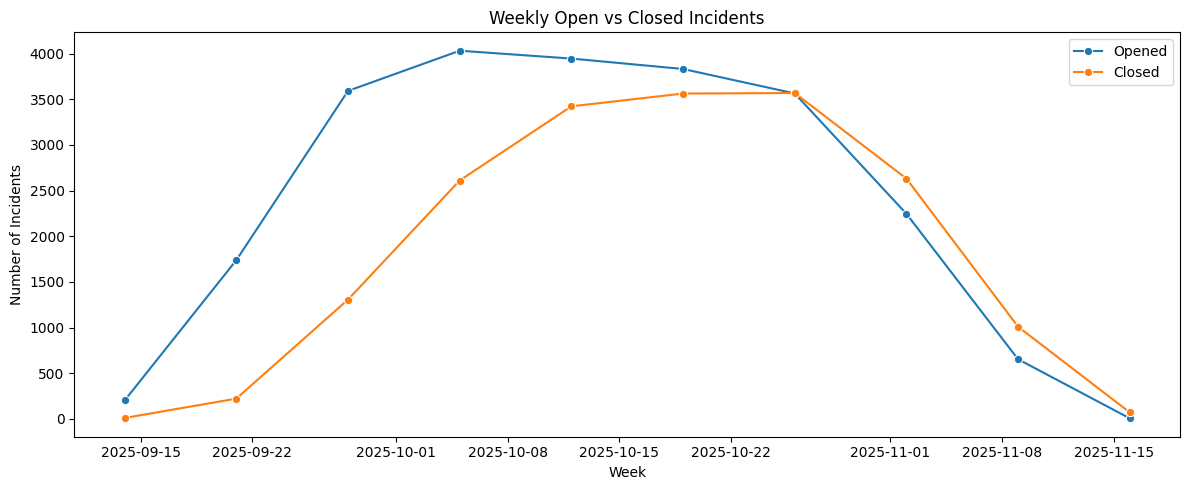

In [22]:
# Create a lineplot for open vs closed incidents over time (weekly)
weekly_opened = df.resample('W', on='opened').size()
weekly_closed = df.resample('W', on='closed').size()

plt.figure(figsize=(12,5))
sns.lineplot(x=weekly_opened.index, y=weekly_opened.values, marker='o', label='Opened')
sns.lineplot(x=weekly_closed.index, y=weekly_closed.values, marker='o', label='Closed')
plt.title("Weekly Open vs Closed Incidents")
plt.xlabel("Week")
plt.ylabel("Number of Incidents")
plt.legend()
plt.tight_layout()
plt.show()

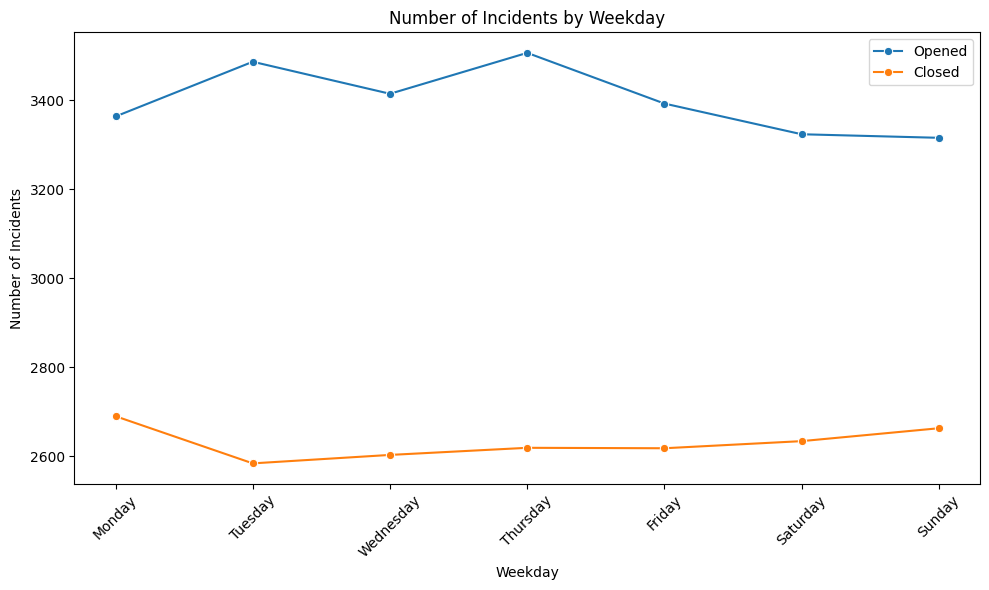

Most incidents opened on: Thursday (3507 incidents, 14.73% of total)
Most incidents closed on: Monday (2690 incidents, 11.30% of total)


In [23]:
# Create a lineplot displaying the number of incidents by open and close day
opened_counts = df["weekday_opened"].value_counts().sort_index()
closed_counts = df["weekday_closed"].value_counts().sort_index()

plt.figure(figsize=(10,6))

sns.lineplot(x=opened_counts.index, y=opened_counts.values, marker="o", label="Opened")

sns.lineplot(x=closed_counts.index, y=closed_counts.values, marker="o", label="Closed")

plt.title("Number of Incidents by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

opened_counts = df["weekday_opened"].value_counts()
closed_counts = df["weekday_closed"].value_counts()
total_incidents = len(df)
most_opened_day = opened_counts.idxmax()
most_closed_day = closed_counts.idxmax()
opened_percent = opened_counts / total_incidents * 100
closed_percent = closed_counts / total_incidents * 100
print(f"Most incidents opened on: {most_opened_day} "
      f"({opened_counts[most_opened_day]} incidents, {opened_percent[most_opened_day]:.2f}% of total)")
print(f"Most incidents closed on: {most_closed_day} "
      f"({closed_counts[most_closed_day]} incidents, {closed_percent[most_closed_day]:.2f}% of total)")

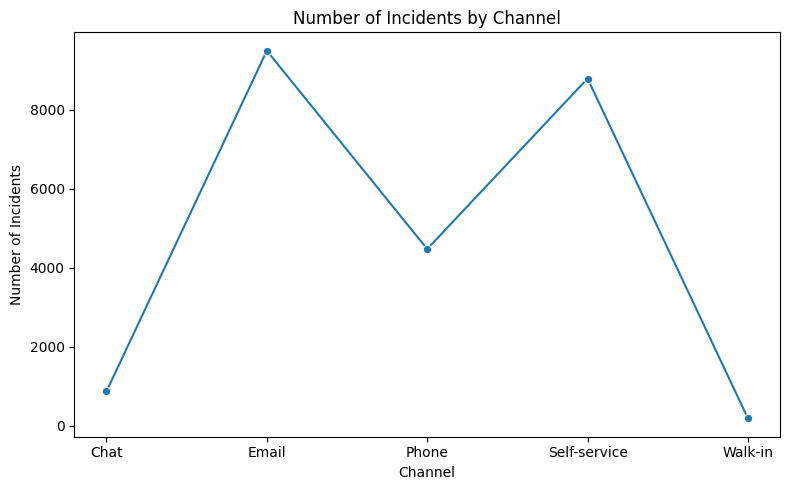

Channel with the most incidents: Email (9489 incidents, 39.86% of total)


In [24]:
# Create a lineplot displaying the number of incidents by channel
channel_counts = df["channel"].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.lineplot(x=channel_counts.index, y=channel_counts.values, marker="o")
plt.title("Number of Incidents by Channel")
plt.xlabel("Channel")
plt.ylabel("Number of Incidents")
plt.tight_layout()
plt.show()

channel_counts = df["channel"].value_counts()
most_incidents_channel = channel_counts.idxmax()
most_incidents_count = channel_counts[most_incidents_channel]
percent = most_incidents_count / total_incidents * 100
print(f"Channel with the most incidents: {most_incidents_channel} "
      f"({most_incidents_count} incidents, {percent:.2f}% of total)")

/tmp/ipython-input-4061049885.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=assignment_counts.values, y=assignment_counts.index, palette="viridis")


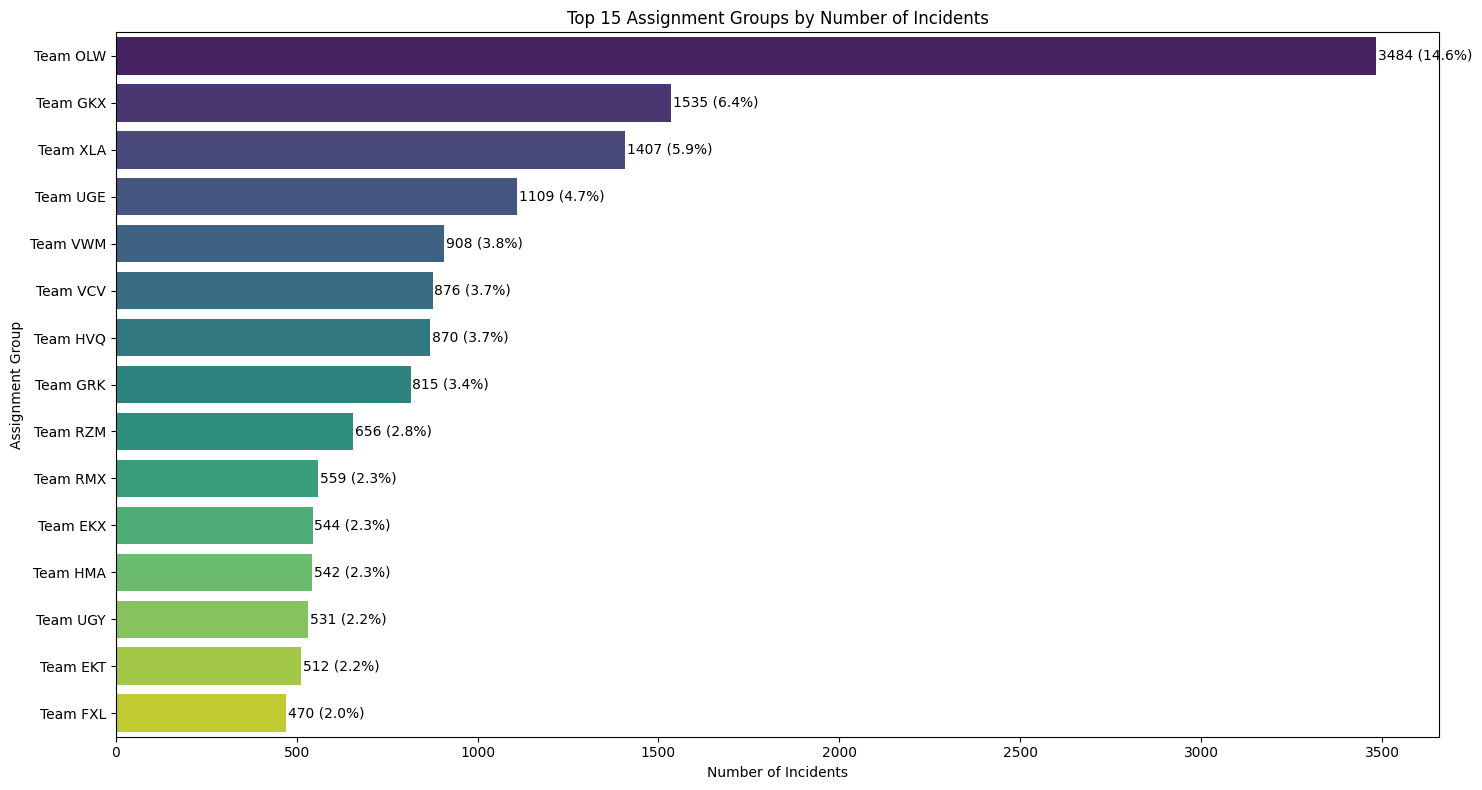

In [25]:
# Create a bar chart for the top 15 assignment groups by incident count
assignment_counts = df["assignment_group"].value_counts().head(15)
total_incidents = len(df)
assignment_percent = assignment_counts / total_incidents * 100

plt.figure(figsize=(15,8))
sns.barplot(x=assignment_counts.values, y=assignment_counts.index, palette="viridis")

for i, (count, pct) in enumerate(zip(assignment_counts.values, assignment_percent.values)):
    plt.text(count + 5, i, f"{count} ({pct:.1f}%)", va='center')

plt.title("Top 15 Assignment Groups by Number of Incidents")
plt.xlabel("Number of Incidents")
plt.ylabel("Assignment Group")
plt.tight_layout()
plt.show()

/tmp/ipython-input-89394812.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_assignees.values, y=top_assignees.index, palette="viridis")


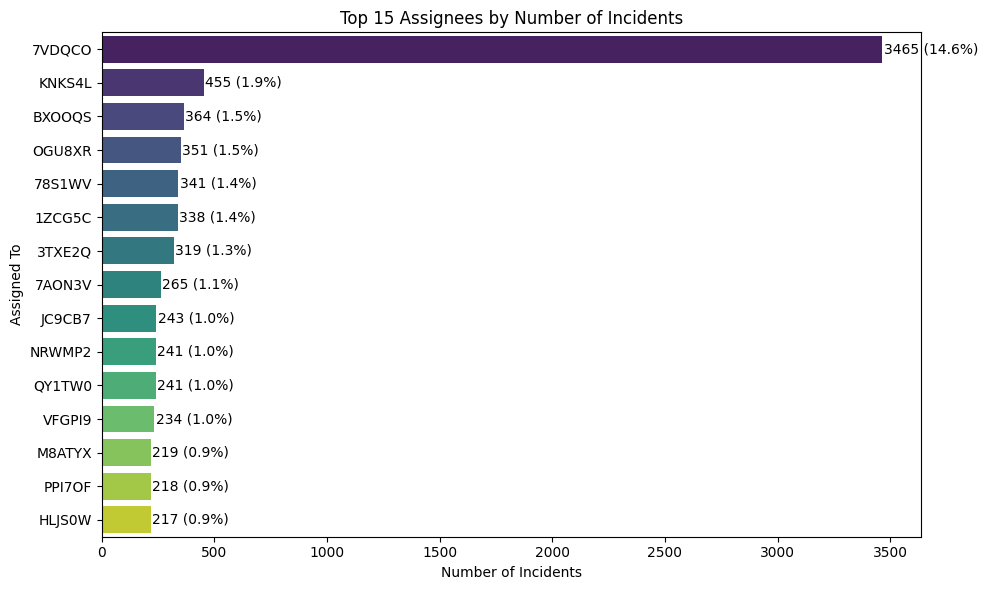

In [26]:
# Create a bar chart for the top 15 assignees by incident count
top_assignees = df['assigned_to'].value_counts().head(15)
total_incidents = len(df)
assignee_percent = top_assignees / total_incidents * 100

plt.figure(figsize=(10,6))
sns.barplot(x=top_assignees.values, y=top_assignees.index, palette="viridis")

for i, (count, pct) in enumerate(zip(top_assignees.values, assignee_percent.values)):
    plt.text(count + 5, i, f"{count} ({pct:.1f}%)", va='center')

plt.title("Top 15 Assignees by Number of Incidents")
plt.xlabel("Number of Incidents")
plt.ylabel("Assigned To")
plt.tight_layout()
plt.show()

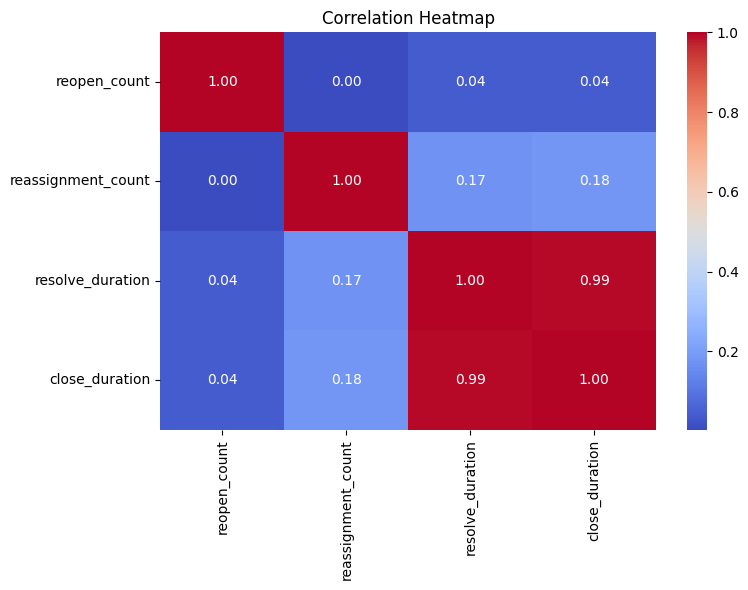

In [27]:
# Create a heatmap of numeric corelations
numeric_cols = ['reopen_count', 'reassignment_count', 'resolve_duration', 'close_duration']
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

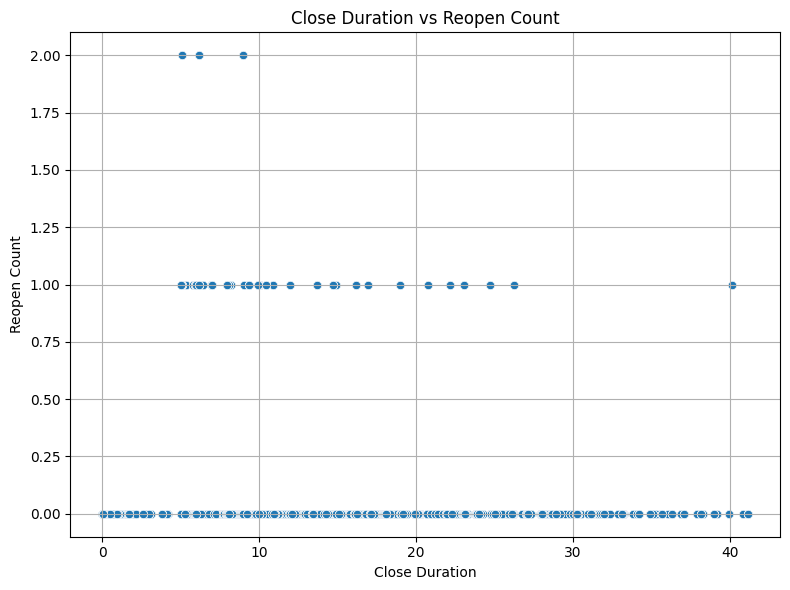

In [28]:
# Create a scatter plot for close duration vs reopen count
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='close_duration', y='reopen_count')
plt.title("Close Duration vs Reopen Count")
plt.xlabel("Close Duration")
plt.ylabel("Reopen Count")
plt.grid(True)
plt.tight_layout()
plt.show()

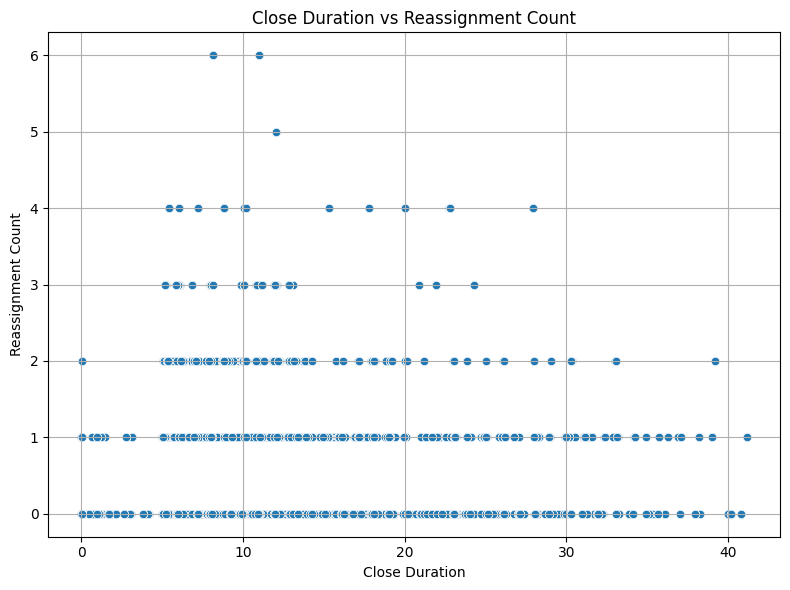

In [31]:
# Create a scatter plot for close duration vs reassignment count
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='close_duration', y='reassignment_count')
plt.title("Close Duration vs Reassignment Count")
plt.xlabel("Close Duration")
plt.ylabel("Reassignment Count")
plt.grid(True)
plt.tight_layout()
plt.show()

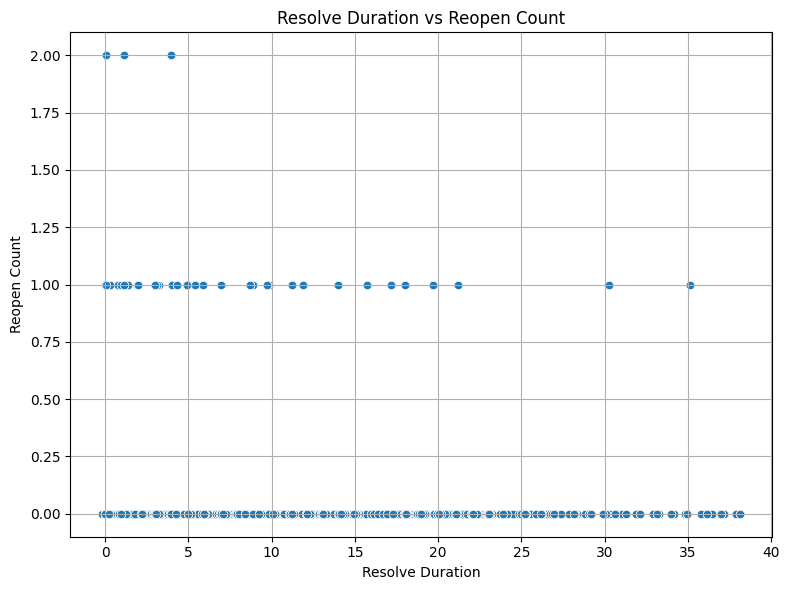

In [30]:
# Create a scatter plot for resolve duration vs reopen count
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='resolve_duration', y='reopen_count')
plt.title("Resolve Duration vs Reopen Count")
plt.xlabel("Resolve Duration")
plt.ylabel("Reopen Count")
plt.grid(True)
plt.tight_layout()
plt.show()

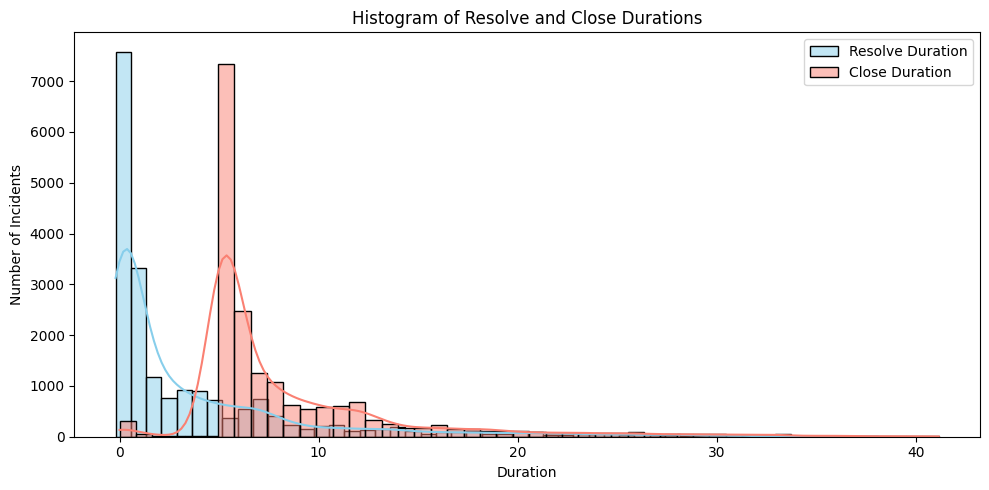

In [32]:
# Create a histogram for resolve and close duration
plt.figure(figsize=(10,5))
sns.histplot(df['resolve_duration'].dropna(), bins=50, color='skyblue', label='Resolve Duration', kde=True)
sns.histplot(df['close_duration'].dropna(), bins=50, color='salmon', label='Close Duration', kde=True)
plt.title("Histogram of Resolve and Close Durations")
plt.xlabel("Duration")
plt.ylabel("Number of Incidents")
plt.legend()
plt.tight_layout()
plt.show()

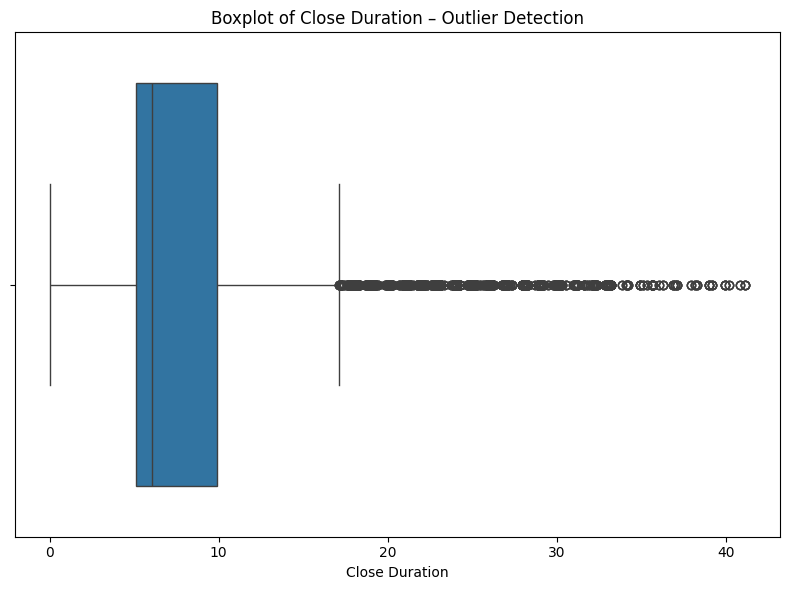

In [33]:
# Create boxplot to show outliers for close duration
plt.figure(figsize=(8,6))
sns.boxplot(x=df['close_duration'])
plt.title("Boxplot of Close Duration – Outlier Detection")
plt.xlabel("Close Duration")
plt.tight_layout()
plt.show()

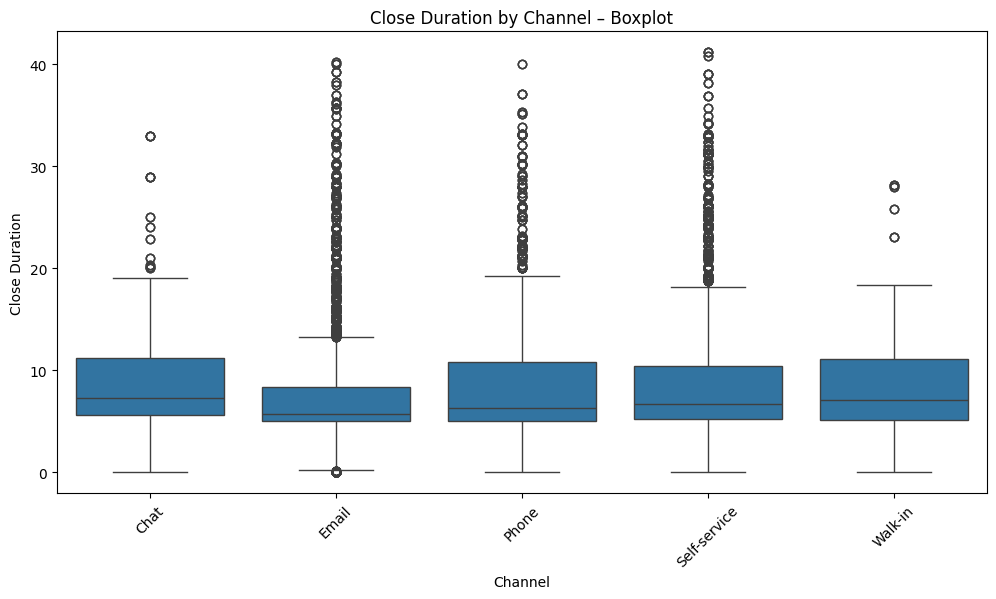

In [36]:
# Create boxplot to show outliers for close duration by channel
plt.figure(figsize=(12,6))
sns.boxplot(x="channel", y="close_duration", data=df)
plt.xticks(rotation=45)
plt.xlabel("Channel")
plt.ylabel("Close Duration")
plt.title("Close Duration by Channel – Boxplot")
plt.show()

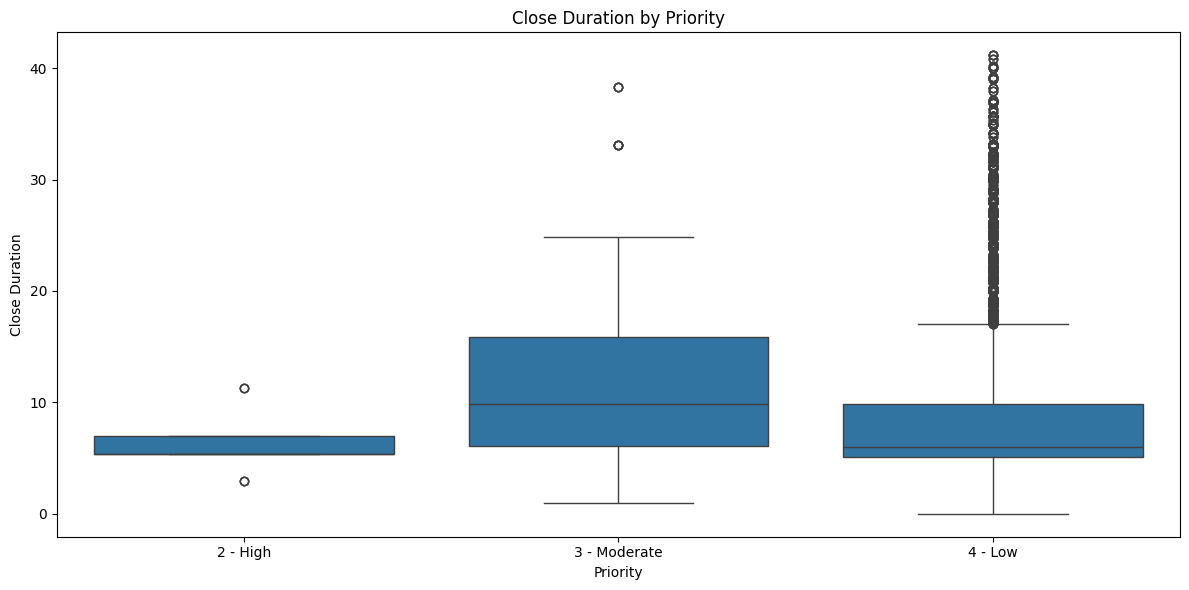

In [37]:
# Create boxplot to show outliers for close duration by priority
plt.figure(figsize=(12,6))
sns.boxplot(x='priority', y='close_duration', data=df)
plt.title("Close Duration by Priority")
plt.ylabel("Close Duration")
plt.xlabel("Priority")
plt.tight_layout()
plt.show()
